# Fashion MNIST Image Classification using CNN
## ----------------------------------------------------------------------------------------------------------------------------------
**Fashion MNIST** is a dataset which consists of images of clothing. Each image is 28x28 grayscale image, with 10 different classes. The dataset contains **70000 images with 60000 for training and 10000 for testing.**
The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

The mapping of all 0-9 integers to class labels is listed below : 

- 0: T-shirt/top 
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

It is a more challenging classification problem than MNIST and top results are achieved by deep learning convolutional neural networks with a classification accuracy of about 90% to 95% on the hold out test dataset. In the code below an **accuracy of around 92% has been achieved** using many layers in Convolutional Neural Networks.

In [33]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

In [34]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Split into training and validation dataset
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [35]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validate = X_validate.reshape((X_validate.shape[0], 28, 28, 1))

In [36]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validate = to_categorical(y_validate)

In [37]:
# convert from integers to floats
# normalize to range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_validate = X_validate.astype('float32') / 255.0

### Here three different models with different number of layers of neural network have been built to measure performance, it would be concluded that deeper network gives better performance and accuracy.

In [41]:
# Building Model-1 with one Convolution Layer
model1 = Sequential(name='Model-1(1-layer)')
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Building Model-2 with two Convolution Layer
model2 = Sequential(name='Model-2(2-layer)')
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Building Model-3 with deeper Convolution Neural Network
model3 = Sequential(name='Model-3(3-layer)')
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Dropout(0.25))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation='softmax'))

models = [model1, model2, model3]


In [42]:
# Compile and fit the models 
history_dict = {}
for model in models:
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=10, verbose=1,
        validation_data=(X_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 38s 794us/step - loss: 0.4616 - accuracy: 0.8381 - val_loss: 0.3411 - val_accuracy: 0.8767
Epoch 2/10
48000/48000 [==============================] - 40s 832us/step - loss: 0.3177 - accuracy: 0.8872 - val_loss: 0.3002 - val_accuracy: 0.8919
Epoch 3/10
48000/48000 [==============================] - 39s 819us/step - loss: 0.2815 - accuracy: 0.8992 - val_loss: 0.2854 - val_accuracy: 0.8925
Epoch 4/10
48000/48000 [==============================] - 39s 820us/step - loss: 0.2604 - accuracy: 0.9049 - val_loss: 0.2758 - val_accuracy: 0.8997
Epoch 5/10
48000/48000 [==============================] - 39s 819us/step - loss: 0.2403 - accuracy: 0.9129 - val_loss: 0.2917 - val_accuracy: 0.8935
Epoch 6/10
48000/48000 [==============================] - 39s 819us/step - loss: 0.2247 - accuracy: 0.9179 - val_loss: 0.2796 - val_accuracy: 0.8996
Epoch 7/10
48000/48000 [==============================] 

### Visualization of the Validation Accuracy and Validation Loss 

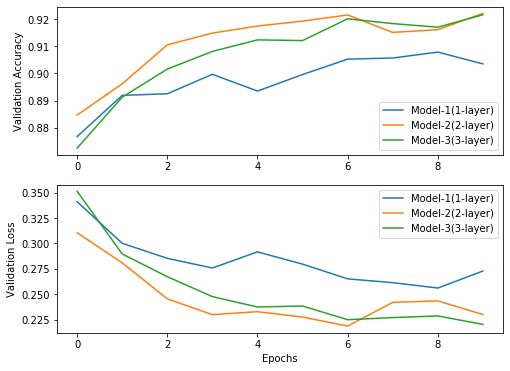

In [43]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()